In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs.RecursiveVPSDE.Markovian_fBiPotDDims.recursive_Markovian_PostMeanScore_fBiPot12Dims_T256_H05_tl_110data_StbleTgt_FULLDATA_LOWNOISE import get_config

In [2]:
config = get_config()
num_paths = 1024 if config.feat_thresh == 1. else 10240
assert num_paths == 10240
root_dir = "/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"

In [9]:
import pandas as pd
def get_drift_files_nonfull(config, root_dir ):
    ts_type = f"{config.ndims}DDims"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/12DDimsLowNoise/"
    true_files = []
    local_files = []
    mses = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file:
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                local_files.append(root_nadaraya_dir+file)
            elif "bwidx" not in file and "MSE"  in file:
                mses = pd.read_parquet(root_nadaraya_dir+file)
    print(mses)
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[4][:-2]
        return float("0." + match)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws, mses

              bw        mse
0       0.000282  33.614250
1       0.000372  33.609016
2       0.000491  33.600719
3       0.000649  33.584919
4       0.000857  33.549496
5       0.001131  33.475677
6       0.001493  33.349377
7       0.001972  33.149719
8       0.002603  32.833511
9       0.003437  32.328114
10      0.004538  31.520460
11      0.005992  30.255087
12      0.007912  28.363693
13      0.010446  25.672594
14      0.013793  22.124931
15      0.018211  17.894421
16      0.024046  13.321377
17      0.031749   8.887419
18      0.041919   5.266376
19      0.055348   2.895413
20      0.073079   1.627910
21      0.096490   1.023776
22      0.127401   0.780155
23      0.168214   0.784715
24      0.222102   1.027921
25      0.293252   1.517219
26      0.387196   2.200832
27      0.511235   2.938020
28      0.675010   3.519130
29      0.891251   3.886075
30      1.135011   4.108048
31      1.445440   4.283300
32      1.840772   4.421499
33      2.344229   4.524925
34      2.985383   4

Text(0.5, 1.0, 'Minimum MSE is (0.78015506, 22)')

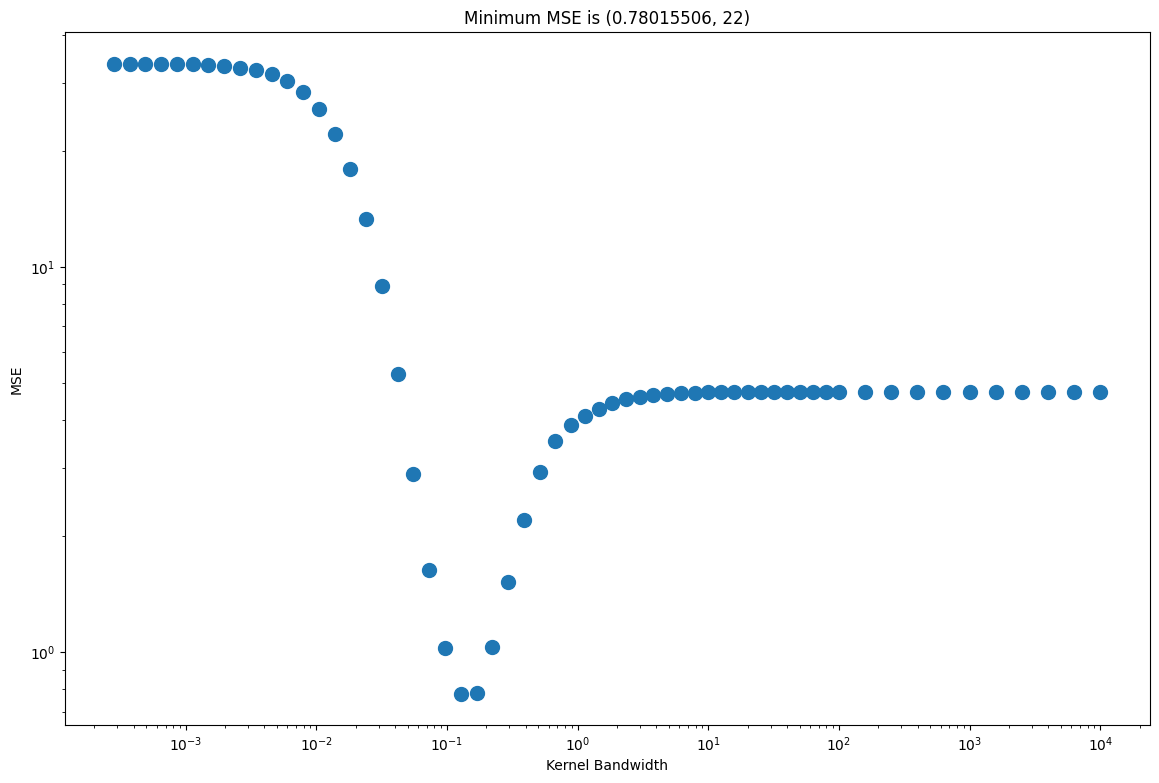

In [12]:
config = get_config()
_, _, bws, mses = get_drift_files_nonfull(config=config, root_dir=root_dir)
fig, ax = plt.subplots(figsize=(14,9))
mses.plot(kind="scatter", x="bw", y="mse", ax=ax, s=100)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("MSE")
ax.set_xlabel("Kernel Bandwidth")
ax.set_title(f"Minimum MSE is {mses.iloc[np.argmin(mses.mse), 1], np.argmin(mses.mse)}")

In [11]:
print(mses)

              bw        mse
0       0.000282  33.614250
1       0.000372  33.609016
2       0.000491  33.600719
3       0.000649  33.584919
4       0.000857  33.549496
5       0.001131  33.475677
6       0.001493  33.349377
7       0.001972  33.149719
8       0.002603  32.833511
9       0.003437  32.328114
10      0.004538  31.520460
11      0.005992  30.255087
12      0.007912  28.363693
13      0.010446  25.672594
14      0.013793  22.124931
15      0.018211  17.894421
16      0.024046  13.321377
17      0.031749   8.887419
18      0.041919   5.266376
19      0.055348   2.895413
20      0.073079   1.627910
21      0.096490   1.023776
22      0.127401   0.780155
23      0.168214   0.784715
24      0.222102   1.027921
25      0.293252   1.517219
26      0.387196   2.200832
27      0.511235   2.938020
28      0.675010   3.519130
29      0.891251   3.886075
30      1.135011   4.108048
31      1.445440   4.283300
32      1.840772   4.421499
33      2.344229   4.524925
34      2.985383   4